<a href="https://colab.research.google.com/github/NitayAmiel/HW_AI_Course/blob/main/HW5_AI_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTICE : change the runtime type to GPU**

In [1]:
!pip install -q tfds-nightly tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.1 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

**loading the data set from tensor flow**

> It might take a while


> the data set is pretty small so the results are not so accurate




In [ ]:
train, test, eval = tfds.load('cats_vs_dogs', split = ['train[:1000]','train[1000:2000]','train[2000:3000]'] ,as_supervised=True)
count = 0
for i in train:
  count += int(i[1])
print("number of dogs in train set " ,count)
count = 0
for i in test:
  count += int(i[1])
print("number of dogs in test set " ,count)
count = 0
for i in eval:
  count += int(i[1])
print("number of dogs in evaluation set " ,count)



In [ ]:
from tensorflow.keras import layers, models


# Load your dataset and preprocess it as needed
# For example, you can use the Cats vs. Dogs dataset from TensorFlow Datasets


# Load the 'cats_vs_dogs' dataset


# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label



train = train.map(preprocess)
test = test.map(preprocess)
eval = eval.map(preprocess)


train_images = np.array([img[0]  for img in train], dtype=np.float32)
test_images = np.array([img[0]  for img in test], dtype=np.float32)
train_labels = np.array([img[1]  for img in train], dtype=np.int32)
test_labels = np.array([img[1]  for img in test],dtype=np.int32)
eval_images = np.array([img[0]  for img in eval], dtype=np.float32)
eval_labels = np.array([img[1]  for img in eval],dtype=np.int32)

# Converting the pixels to number in [0,1]
train_images = train_images.reshape((len(train_images), 150, 150, 3))
test_images = test_images.reshape((len(test_images), 150, 150, 3))
eval_images = eval_images.reshape((len(eval_images), 150, 150, 3))

print(len(train_images))


# Training the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

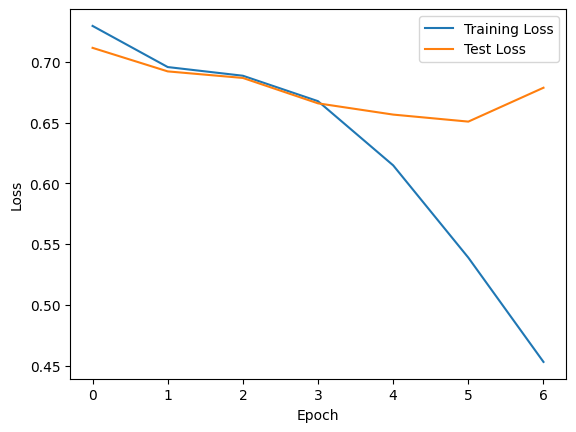

In [6]:


# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=7,batch_size = 32, validation_data = (test_images, test_labels))

# Plot the training loss and test loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



evaluation

In [7]:
# Evaluation:
eval_loss, eval_accuracy = model.evaluate(eval_images, eval_labels)

print(f'Test Loss: {eval_loss}')
print(f'Test Accuracy: {eval_accuracy}')

32/32 [==============================] - 0s 11ms/step - loss: 0.6598 - accuracy: 0.6640
Test Loss: 0.6597642302513123
Test Accuracy: 0.6639999747276306


prediction

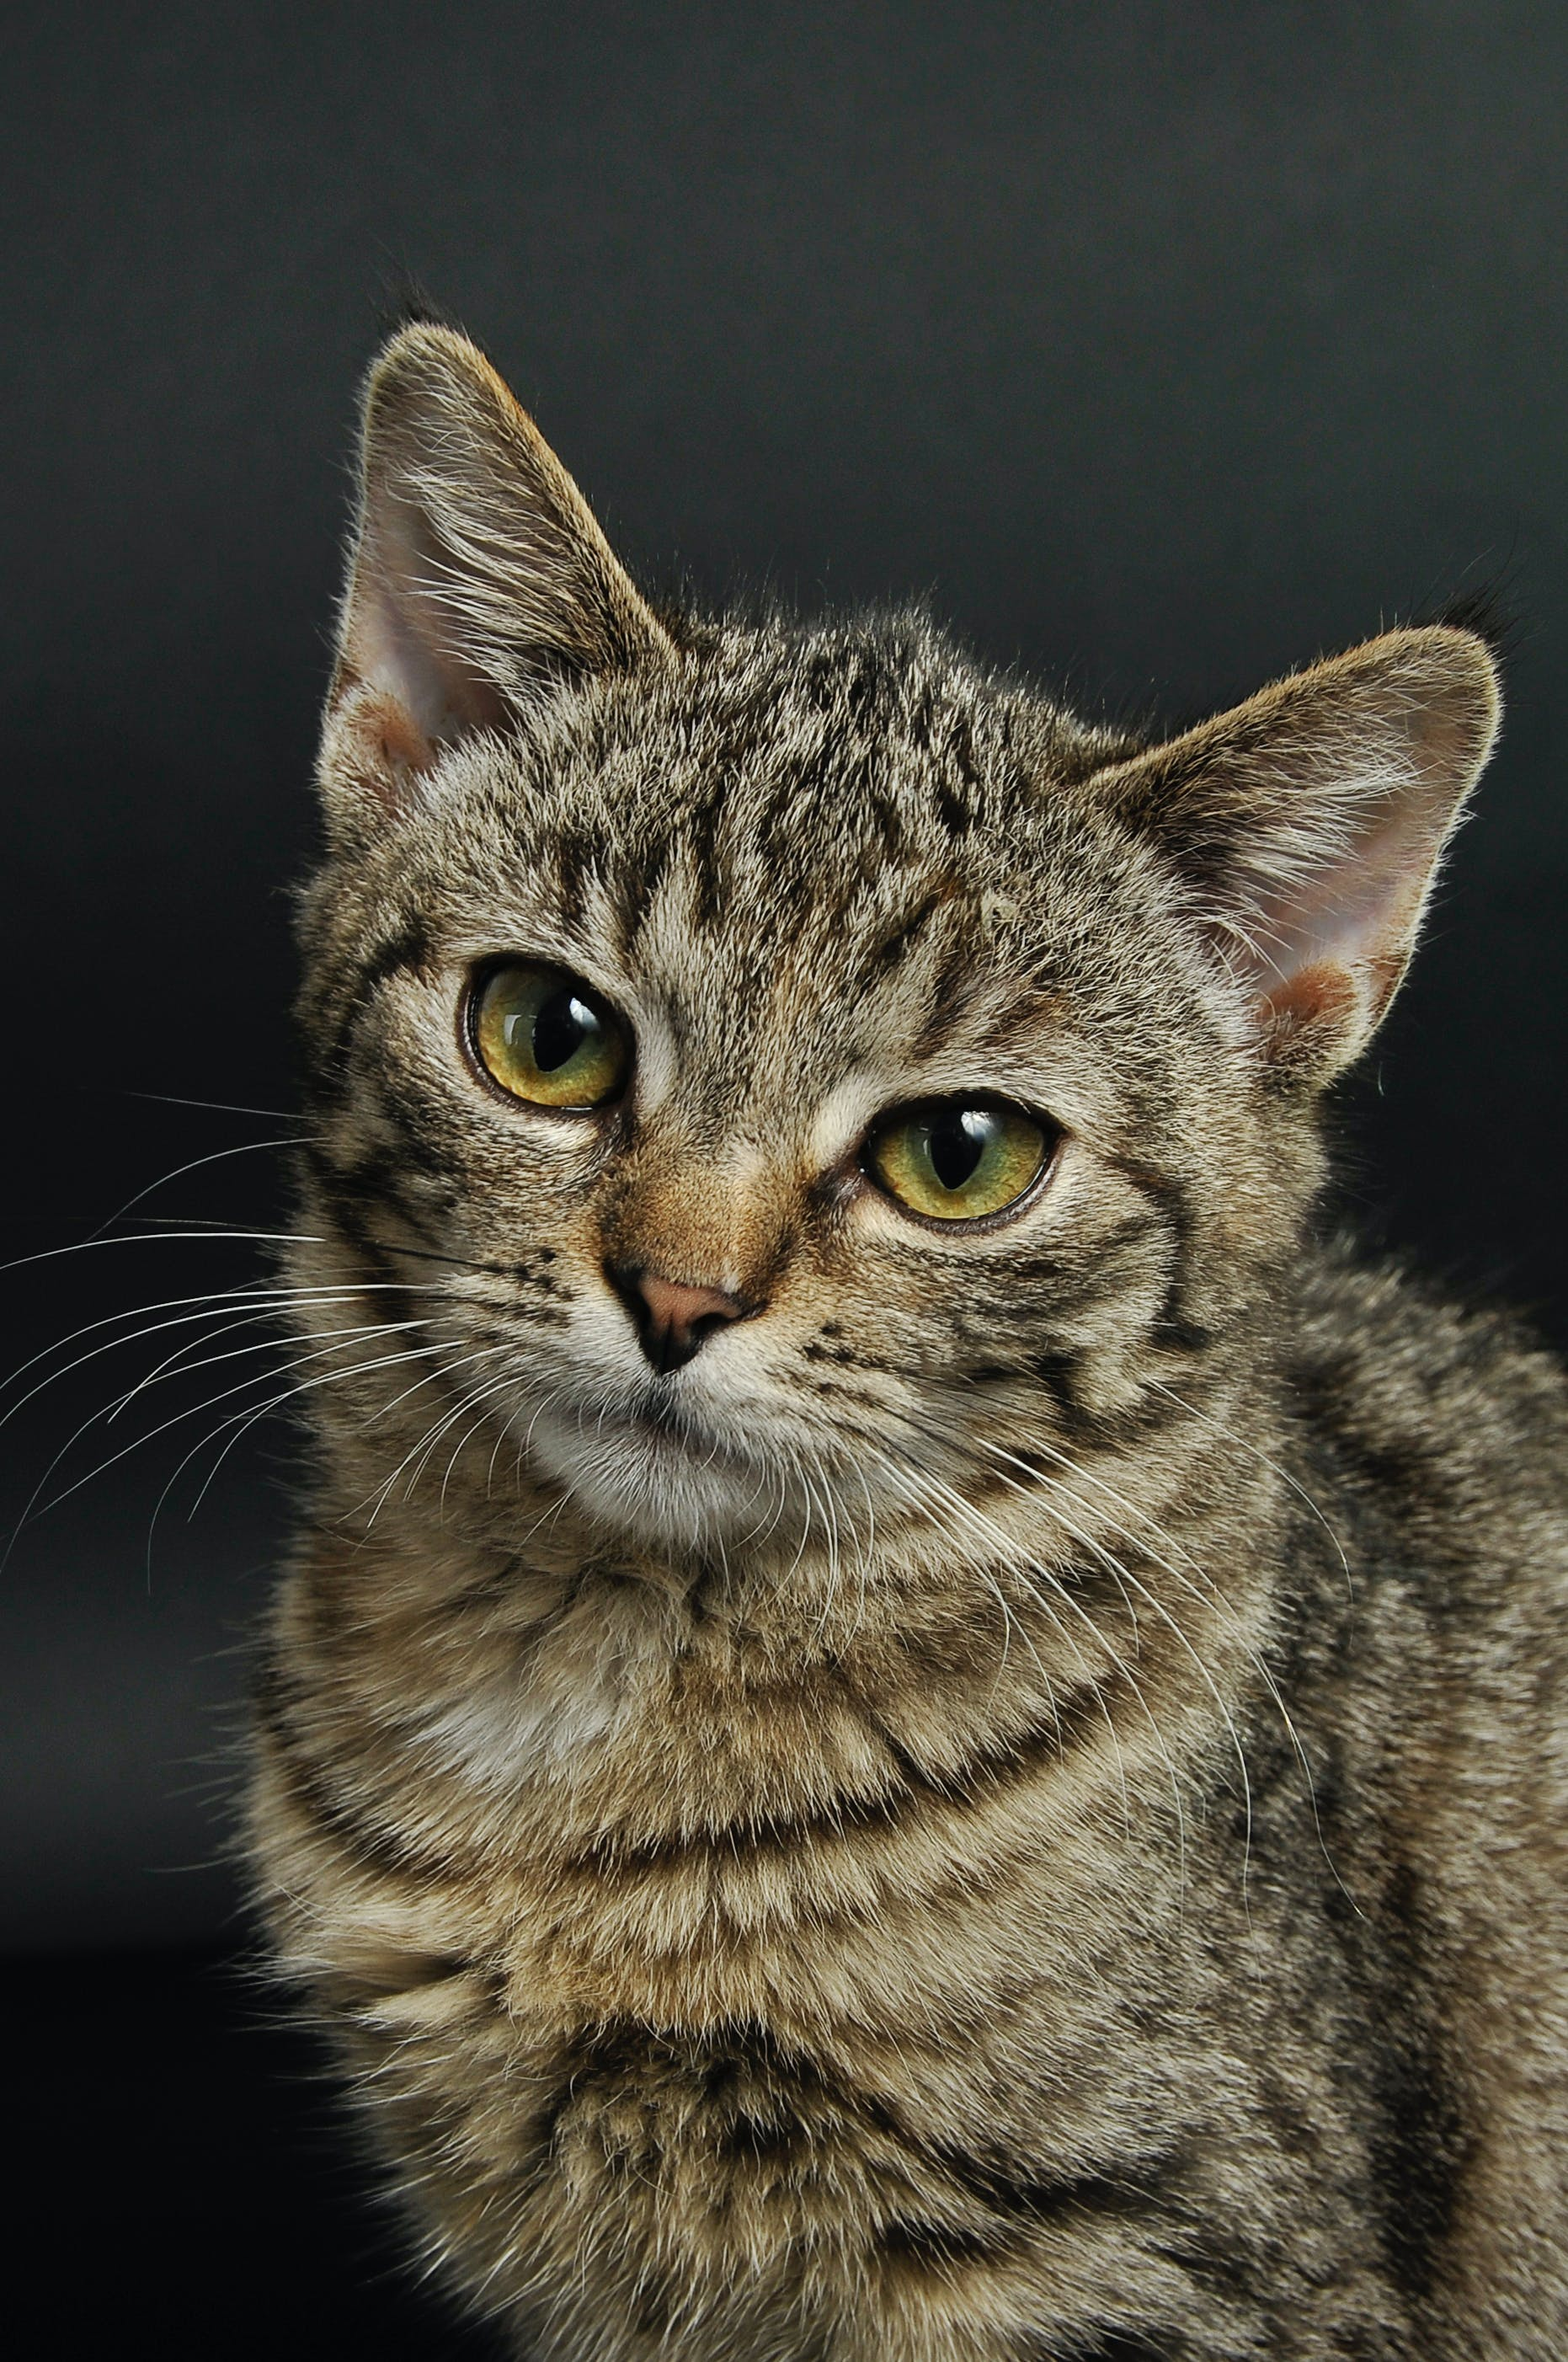

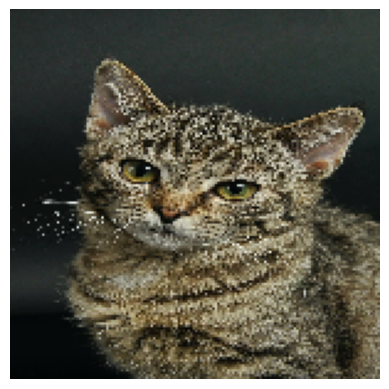

In [13]:
from IPython.display import display, Image

image_path = '/content/drive/MyDrive/testing123/cat_image.jpg'
display(Image(image_path))


image_data = tf.io.read_file(image_path)

# Decode the JPEG image using tf.image.decode_image
image_tensor = tf.image.decode_image(image_data)

# Optional: Convert the image tensor to a specific data type (e.g., float32) and normalize values
# image_tensor = tf.image.convert_image_dtype(image_tensor, dtype=tf.float32)
# image_tensor /= 255.0  # Normalize pixel values to [0, 1]

image = image_tensor
image = tf.image.resize(image, (150, 150))
image = tf.cast(image, tf.float32) / 255.0
tmp = np.array([image], dtype=np.float32)
tmp = tmp.reshape(1, 150, 150, 3)
plt.imshow(image.numpy())
plt.axis('off')
plt.show()




In [14]:
predictions = model.predict(tmp)
print(predictions)

1/1 [==============================] - 0s 173ms/step
[[0.6127216]]
